# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión lineal: Lección 4**
### **Asunciones**

---

In [25]:

# Tratamiento de datos
# --------------------
import numpy as np
import pandas as pd

# Gráficos
# --------
import matplotlib.pyplot as plt
import seaborn as sns

# Para navegar entre directorios
# ----------------------------------
import os

# Estadísticos
# ------------------------------------------------------------------------------
from scipy import stats
import researchpy as rp
from scipy.stats import levene

# Asunciones
from itertools import combinations


# Establecer tamaño fijo de gráficas
# ----------------------------------
plt.rcParams["figure.figsize"] = (15,15)

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.


In [9]:
os.getcwd()

'/mnt/c/Users/User/Desktop/ADALAB/MODULO3/promo-d-da-modulo3-sprint1-elisa-lidya/regresion-lineal'

In [10]:
os.chdir('/mnt/c/Users/User/Desktop/ADALAB/MODULO3/promo-d-da-modulo3-sprint1-elisa-lidya/regresion-lineal')


In [11]:
df_socio = pd.read_csv("../datos/esperanza_de_vida.csv", index_col=0)
df_socio.head(50)

,country,Region,Population in millions (2017),"Population density (per km2, 2017)",Urban population (% of total population)_y,GDP per capita (current US$),Health: Total expenditure (% of GDP),Health Care Index,Health: Physicians (per 1000 pop.),Quantity of Physicians (per 1000 pop.),Quality Of Life Index,Purchasing Power Index,Safety Index,Pop. using improved drinking water: urban(%),Pop. using improved drinking water: rural (%),Pollution index,"Life expectancy at birth, total (years)"
0,Argentina,SouthAmerica,44.271,16.2,91.749,14564.5,4.80,73.30,3.80,Muchos,139.59,58.40,37.37,96.20,98.30,53.33,76.372000
1,Australia,Oceania,24.451,3.2,85.904,51352.2,9.40,74.25,3.40,Medios,176.54,101.94,57.58,100.00,100.00,24.58,82.500000
2,Austria,WesternEurope,8.736,106.0,58.094,44117.7,11.20,80.91,5.20,Muchos,190.37,95.66,80.75,100.00,100.00,21.90,81.643902
3,Belarus,EasternEurope,9.468,46.7,78.134,5750.8,5.70,53.76,4.10,Muchos,119.23,36.43,77.74,94.10,95.20,39.64,74.129268
4,Belgium,WesternEurope,11.429,377.5,97.961,40277.8,10.60,78.92,3.00,Medios,160.52,91.02,55.49,99.50,99.40,48.92,81.492683
5,Bosnia and Herzegovina,SouthernEurope,3.507,68.8,47.876,4265.0,9.60,61.49,1.90,Muy pocos,139.14,51.29,59.03,98.90,92.00,60.69,77.128000
6,Brazil,SouthAmerica,209.288,25.0,86.309,8528.3,8.30,51.70,1.90,Muy pocos,96.15,42.38,29.38,88.00,51.50,61.17,75.456000
7,Bulgaria,EasternEurope,7.085,65.3,74.669,6846.8,8.40,54.03,4.00,Muchos,138.20,51.40,59.82,86.80,83.70,63.12,74.814634
8,Canada,NorthernAmerica,36.624,4.0,81.350,43205.6,10.40,69.23,2.50,Pocos,167.18,108.01,60.75,100.00,99.00,26.54,81.948780
9,Chile,SouthAmerica,18.055,24.3,87.490,13416.2,7.80,60.97,3.36,Medios,136.20,61.28,52.50,100.00,90.90,67.67,79.909000


In [12]:
df_socio.tail(16)

,country,Region,Population in millions (2017),"Population density (per km2, 2017)",Urban population (% of total population)_y,GDP per capita (current US$),Health: Total expenditure (% of GDP),Health Care Index,Health: Physicians (per 1000 pop.),Quantity of Physicians (per 1000 pop.),Quality Of Life Index,Purchasing Power Index,Safety Index,Pop. using improved drinking water: urban(%),Pop. using improved drinking water: rural (%),Pollution index,"Life expectancy at birth, total (years)"
50,Slovakia,EasternEurope,5.448,113.3,53.751,16082.5,8.1,62.63,3.40,Medios,152.55,64.75,69.82,99.4,98.2,43.51,77.165854
51,Slovenia,SouthernEurope,2.080,103.3,54.273,20689.8,9.2,64.35,2.80,Pocos,175.45,78.23,75.95,99.1,99.1,26.37,81.029268
52,South Africa,SouthernAfrica,56.717,46.8,65.850,5773.0,8.8,61.72,0.80,Muy pocos,144.72,98.96,24.28,69.6,60.5,63.56,63.538000
53,Spain,SouthernEurope,46.354,92.9,80.080,25865.4,9.0,76.65,3.80,Muchos,183.65,87.87,68.72,99.8,100.0,37.46,83.282927
54,Sri Lanka,SouthernAsia,20.877,332.9,18.384,3973.7,3.5,80.04,1.66,Muy pocos,88.99,30.28,65.43,88.1,96.7,61.90,76.648000
55,Sweden,NorthernEurope,9.911,24.2,87.146,50687.5,11.9,70.64,4.10,Muchos,172.74,107.23,53.35,99.2,99.6,17.87,82.409756
56,Switzerland,WesternEurope,8.476,214.5,73.761,80831.1,11.7,71.04,4.10,Muchos,173.54,95.35,77.55,99.9,99.8,20.77,83.551220
57,Thailand,South-easternAsia,69.038,135.1,49.200,5814.8,4.1,80.66,2.30,Pocos,57.21,34.28,50.22,89.9,96.1,73.23,76.683000
58,The former Yugoslav Republic of Macedonia,SouthernEurope,2.083,82.6,57.748,4836.1,6.5,63.46,2.80,Pocos,116.42,39.85,61.34,97.2,82.6,83.38,75.589000
59,Turkey,WesternAsia,80.745,104.9,74.644,9125.8,5.4,71.68,1.70,Muy pocos,129.63,55.64,58.91,98.3,85.5,70.46,77.161000


El objetivo de este pairprgramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. Recordamos que estas asunciones son:

 - Normalidad (ya la deberíais haber evaluado)
 - Homogeneidad de varianzas
 - Independencia de las variables

Cada asunción la deberéis testar de forma visual y analítica.

**Asunción de normalidad (comprobación analítica):**

In [13]:
stats.shapiro(df_socio["Life expectancy at birth, total (years)"])

ShapiroResult(statistic=0.9383590221405029, pvalue=0.002661803737282753)

`Como nuestro pvalue es de 0.0026, comprobamos que es menor de 0.05, por lo que podemos rechazar la hipótesis nula y asumimos que nuestros datos no son normales.`

**Asunción de normalidad (comprobación visual):**

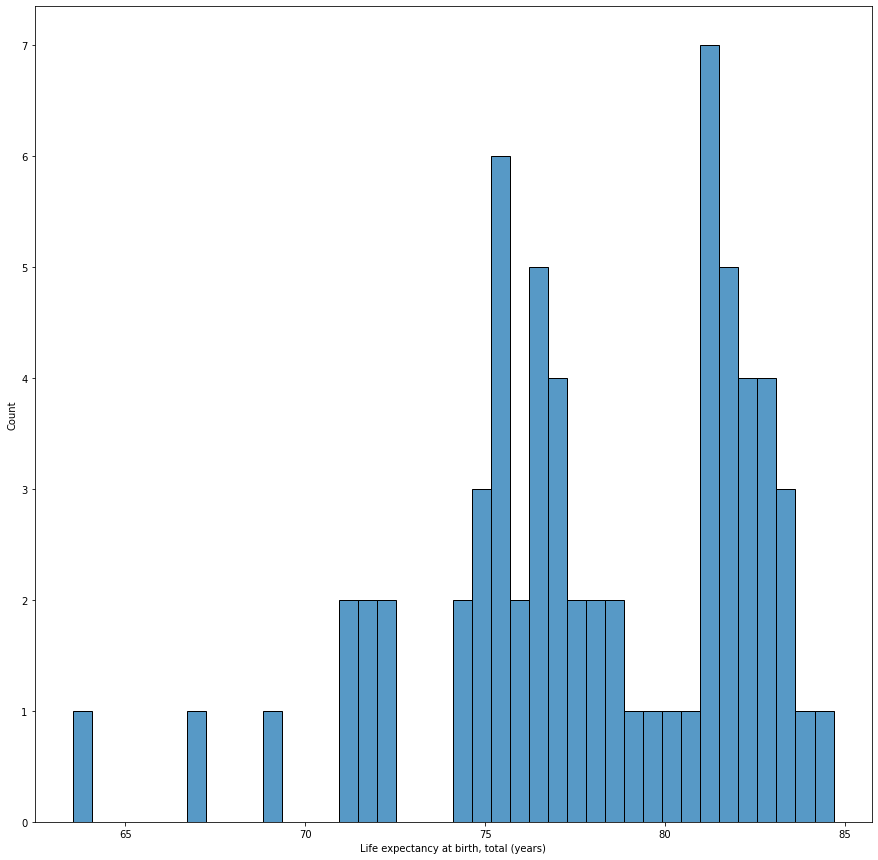

In [14]:
sns.histplot(x=df_socio["Life expectancy at birth, total (years)"], bins = 40);

`Comprobamos visualmente que nuestros datos no tienen una distribución normal.`

**Asunción de homocedasticidad (comprobación analítica):**

In [15]:
resultados = {}

numericas_col = df_socio.select_dtypes(include = np.number).drop("Life expectancy at birth, total (years)", axis = 1).columns

for col in numericas_col:

    statistic, p_val = levene(df_socio[col], df_socio['Life expectancy at birth, total (years)'], center='median')

    resultados[col] = p_val
    
resultados

{'Population in millions (2017)': 0.00973007802552614,
 'Population density (per km2, 2017)': 0.049537762483638066,
 'Urban population (% of total population)_y': 1.680081775932959e-11,
 'GDP per capita (current US$)': 2.9276196773635808e-15,
 'Health: Total expenditure (% of GDP)': 0.00018270538005963225,
 'Health Care Index': 8.541260982440067e-08,
 'Health: Physicians (per 1000 pop.)': 1.3767062313389949e-13,
 'Quality Of Life Index': 6.1682184765906774e-15,
 'Purchasing Power Index': 1.0502360837978383e-21,
 'Safety Index': 2.852943260695837e-09,
 'Pop. using improved drinking water: urban(%)': 0.19062591374698443,
 'Pop. using improved drinking water: rural (%)': 0.00033771899550871554,
 'Pollution index': 7.838870128095901e-20}

In [16]:
df_socio["Region"].unique()

array(['SouthAmerica', 'Oceania', 'WesternEurope', 'EasternEurope',
       'SouthernEurope', 'NorthernAmerica', 'EasternAsia', 'WesternAsia',
       'NorthernEurope', 'NorthernAfrica', 'SouthernAsia',
       'South-easternAsia', 'CentralAmerica', 'SouthernAfrica'],
      dtype=object)

In [17]:
SouthAmerica = df_socio[df_socio["Region"] == 'SouthAmerica']["Life expectancy at birth, total (years)"]
Oceania = df_socio[df_socio["Region"] == 'Oceania']["Life expectancy at birth, total (years)"]
WesternEurope = df_socio[df_socio["Region"] == 'WesternEurope']["Life expectancy at birth, total (years)"]
EasternEurope = df_socio[df_socio["Region"] == 'EasternEurope']["Life expectancy at birth, total (years)"]
SouthernEurope = df_socio[df_socio["Region"] == 'SouthernEurope']["Life expectancy at birth, total (years)"]
NorthernAmerica = df_socio[df_socio["Region"] == 'NorthernAmerica']["Life expectancy at birth, total (years)"]
EasternAsia = df_socio[df_socio["Region"] == 'EasternAsia']["Life expectancy at birth, total (years)"]
WesternAsia = df_socio[df_socio["Region"] == 'WesternAsia']["Life expectancy at birth, total (years)"]
NorthernEurope = df_socio[df_socio["Region"] == 'NorthernEurope']["Life expectancy at birth, total (years)"]
NorthernAfrica = df_socio[df_socio["Region"] == 'NorthernAfrica']["Life expectancy at birth, total (years)"]
SouthernAsia = df_socio[df_socio["Region"] == 'SouthernAsia']["Life expectancy at birth, total (years)"]
SoutheasternAsia = df_socio[df_socio["Region"] == 'South-easternAsia']["Life expectancy at birth, total (years)"]
CentralAmerica = df_socio[df_socio["Region"] == 'CentralAmerica']["Life expectancy at birth, total (years)"]
SouthernAfrica = df_socio[df_socio["Region"] == 'SouthernAfrica']["Life expectancy at birth, total (years)"]


In [18]:
levene_test_region = stats.levene(SouthAmerica, Oceania, WesternEurope, EasternEurope, SouthernEurope, NorthernAmerica, EasternAsia, WesternAsia, NorthernEurope, NorthernAfrica, SouthernAsia, SoutheasternAsia, CentralAmerica, SouthernAfrica, center='median')
levene_test_region

LeveneResult(statistic=1.2861814019400974, pvalue=0.25118323231959416)

In [19]:
df_socio["Quantity of Physicians (per 1000 pop.)"].unique()

array(['Muchos', 'Medios', 'Muy pocos', 'Pocos'], dtype=object)

In [20]:
muy_pocos = df_socio[df_socio["Quantity of Physicians (per 1000 pop.)"] == 'Muy pocos']["Life expectancy at birth, total (years)"]
pocos = df_socio[df_socio["Quantity of Physicians (per 1000 pop.)"] == 'Pocos']["Life expectancy at birth, total (years)"]
medios = df_socio[df_socio["Quantity of Physicians (per 1000 pop.)"] == 'Medios']["Life expectancy at birth, total (years)"]
muchos = df_socio[df_socio["Quantity of Physicians (per 1000 pop.)"] == 'Muchos']["Life expectancy at birth, total (years)"]

In [21]:
levene_test_cantidad_medicos = stats.levene(muy_pocos, pocos, medios, muchos, center='median')
levene_test_cantidad_medicos

LeveneResult(statistic=0.5901847615711848, pvalue=0.6237445454283979)

`Las siguientes columna son las únicas que cumplen la asunción de homocedasticidad:`
- Pop. using improved drinking water: urban(%)
- Region
- Quantity of Physicians (per 1000 pop.)

`El resto de las columnas no cumplen la asunción de homocedasticidad, y por lo tanto, tienen una covarianza heterogénea:`
- Population in millions (2017)
- Population density (per km2, 2017) (Aunque este se queda muy cerca)
- Urban population (% of total population)_y
- GDP per capita (current US$)
- Health: Total expenditure (% of GDP)
- Health Care Index
- Health: Physicians (per 1000 pop.)
- Quality Of Life Index
- Purchasing Power Index
- Safety Index
- Pop. using improved drinking water: rural (%)
- Pollution index


**Asunción de homocedasticidad (comprobación visual):**

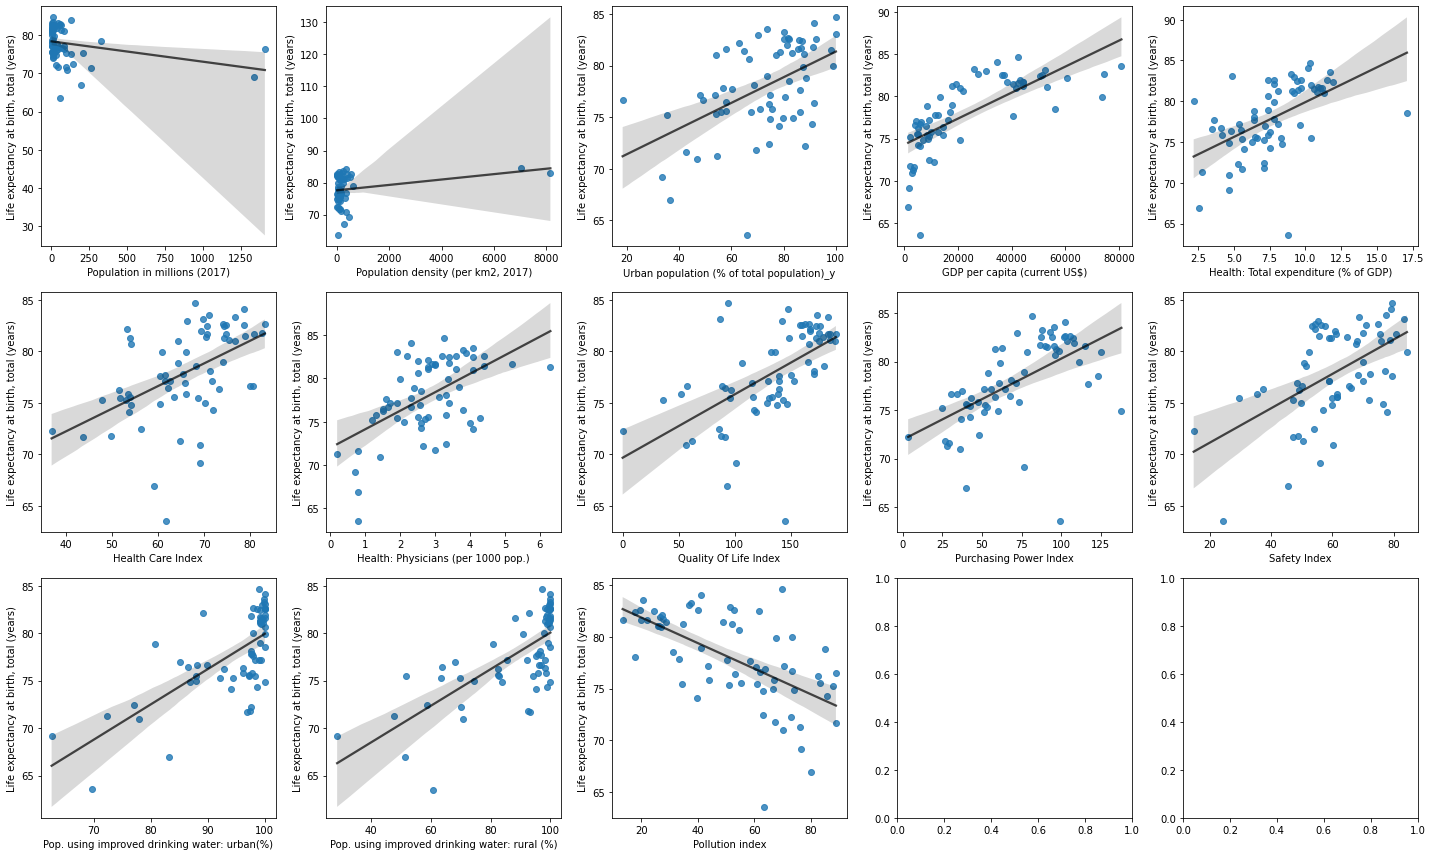

In [22]:

fig, axes = plt.subplots(nrows = 3, ncols = 5, figsize = (20,12))
axes = axes.flat

for i, colum in enumerate(numericas_col): 
    
    sns.regplot(
        data = df_socio,
        x = colum,
        y = 'Life expectancy at birth, total (years)',
        #color = lista_colores[i],
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    fig.tight_layout()

`En base a lo que vemos en esta gráfica, ninguna de las variables sería homocedástica, porque la dispersión de los valores no nos parece homogénea. Nos llama mucho la atención que la gráfica referente a la población urbana con acceso a agua potable sea tan parecida a su homónima en la vertiente rural, ya que, según nos ha indicado la comprobación analítica mediante el test de Levene, la primera sí sería homocedástica pero la segunda no.`

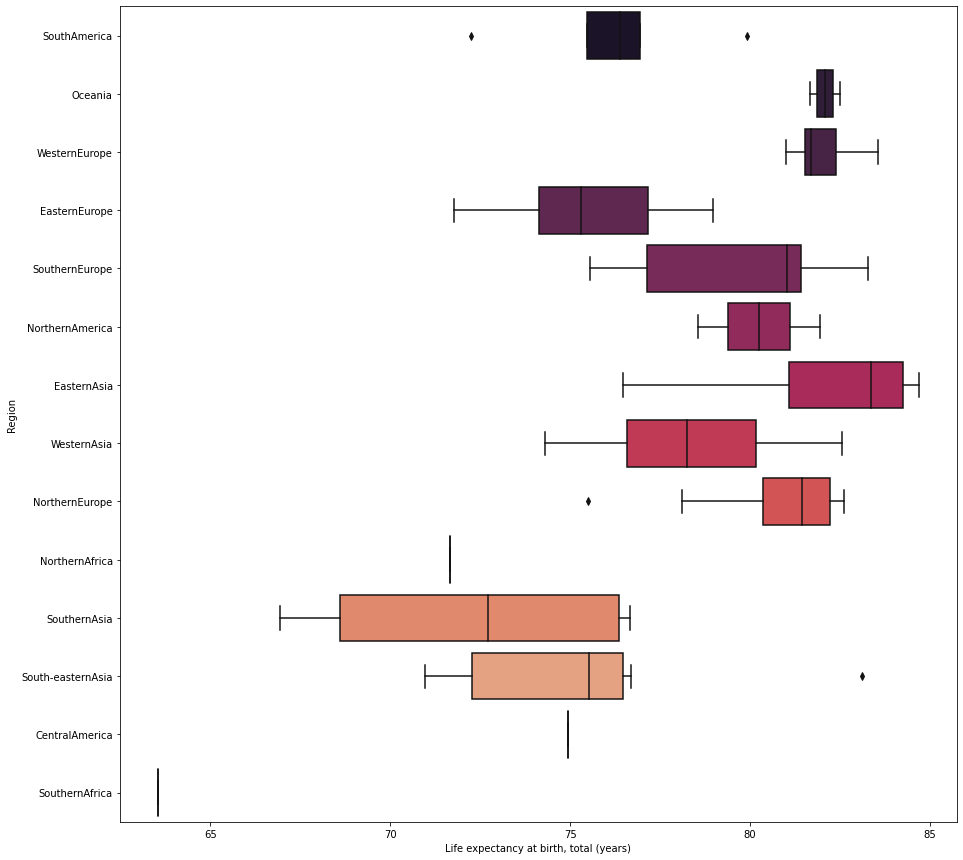

In [23]:
sns.boxplot(y = 'Region', x = 'Life expectancy at birth, total (years)', data = df_socio, palette = 'rocket');

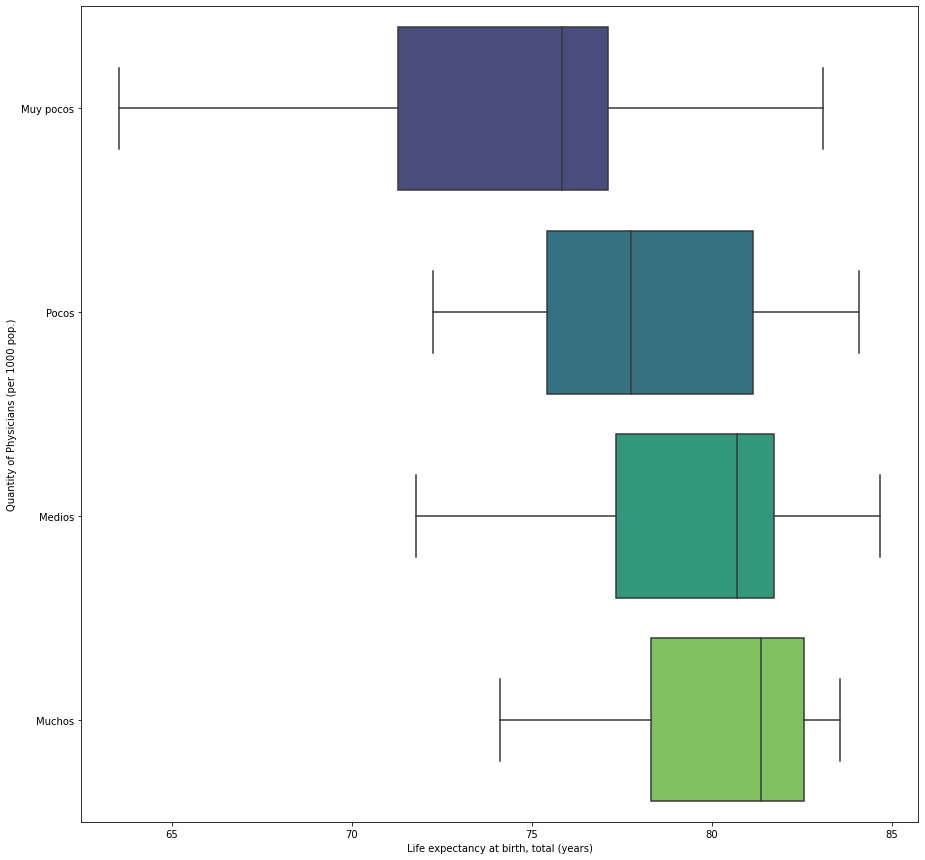

In [24]:
sns.boxplot(y = 'Quantity of Physicians (per 1000 pop.)', x = 'Life expectancy at birth, total (years)', data = df_socio, palette = 'viridis', order = ["Muy pocos","Pocos", "Medios", "Muchos"]);

`Hemos sacado también boxplots para las dos variables categóricas que nos parecen de interés (ya que la otra, la del nombre del país, se comporta más como un índice que como una variable categórica).`

**Asunción de independencia (comprobación analítica):**

In [44]:
predictoras = df_socio.drop("Life expectancy at birth, total (years)", axis=1)

In [45]:
combinaciones = list(combinations(predictoras.columns, 2))
print(combinaciones) 

[('country', 'Region'), ('country', 'Population in millions (2017)'), ('country', 'Population density (per km2, 2017)'), ('country', 'Urban population (% of total population)_y'), ('country', 'GDP per capita (current US$)'), ('country', 'Health: Total expenditure (% of GDP)'), ('country', 'Health Care Index'), ('country', 'Health: Physicians (per 1000 pop.)'), ('country', 'Quantity of Physicians (per 1000 pop.)'), ('country', 'Quality Of Life Index'), ('country', 'Purchasing Power Index'), ('country', 'Safety Index'), ('country', 'Pop. using improved drinking water: urban(%)'), ('country', 'Pop. using improved drinking water: rural (%)'), ('country', 'Pollution index'), ('Region', 'Population in millions (2017)'), ('Region', 'Population density (per km2, 2017)'), ('Region', 'Urban population (% of total population)_y'), ('Region', 'GDP per capita (current US$)'), ('Region', 'Health: Total expenditure (% of GDP)'), ('Region', 'Health Care Index'), ('Region', 'Health: Physicians (per 100

In [46]:
lista_dependientes= []
lista_independientes= []

for tupla in combinaciones:

    col1 = tupla[0]
    col2 = tupla[1]

    crosstab_col1_col2, test_results_col1_col2, expected_col1_col2 = rp.crosstab(df_socio[col1], df_socio[col2],
                                                                                                 test= "chi-square",
                                                                                                 expected_freqs= True,
                                                                                                 prop= "cell")
        

    if test_results_col1_col2.iloc[1][1] >= 0.05:
        lista = [col1, col2]
        lista_independientes.append(lista)
        print(f"Las variables {col1} y {col2} son independientes")
    else:
        lista = [col1, col2]
        lista_dependientes.append(lista)
        print(f"Las variables {col1} y {col2} son dependientes")
    
    print("---------------------------")
    

Las variables country y Region son independientes
---------------------------
Las variables country y Population in millions (2017) son independientes
---------------------------
Las variables country y Population density (per km2, 2017) son independientes
---------------------------
Las variables country y Urban population (% of total population)_y son independientes
---------------------------
Las variables country y GDP per capita (current US$) son independientes
---------------------------
Las variables country y Health: Total expenditure (% of GDP) son independientes
---------------------------
Las variables country y Health Care Index son independientes
---------------------------
Las variables country y Health: Physicians (per 1000 pop.) son independientes
---------------------------
Las variables country y Quantity of Physicians (per 1000 pop.) son independientes
---------------------------
Las variables country y Quality Of Life Index son independientes
-----------------------

In [47]:
#¿Que hacemos con las v.dependientes?
lista_dependientes

[['Region', 'Health: Total expenditure (% of GDP)'],
 ['Region', 'Quantity of Physicians (per 1000 pop.)'],
 ['Health: Total expenditure (% of GDP)',
  'Pop. using improved drinking water: urban(%)'],
 ['Health: Physicians (per 1000 pop.)',
  'Quantity of Physicians (per 1000 pop.)'],
 ['Health: Physicians (per 1000 pop.)',
  'Pop. using improved drinking water: urban(%)'],
 ['Health: Physicians (per 1000 pop.)',
  'Pop. using improved drinking water: rural (%)'],
 ['Pop. using improved drinking water: urban(%)',
  'Pop. using improved drinking water: rural (%)']]

**Asunción de independencia (comprobación visual):**

In [48]:
predictoras.shape

(66, 16)

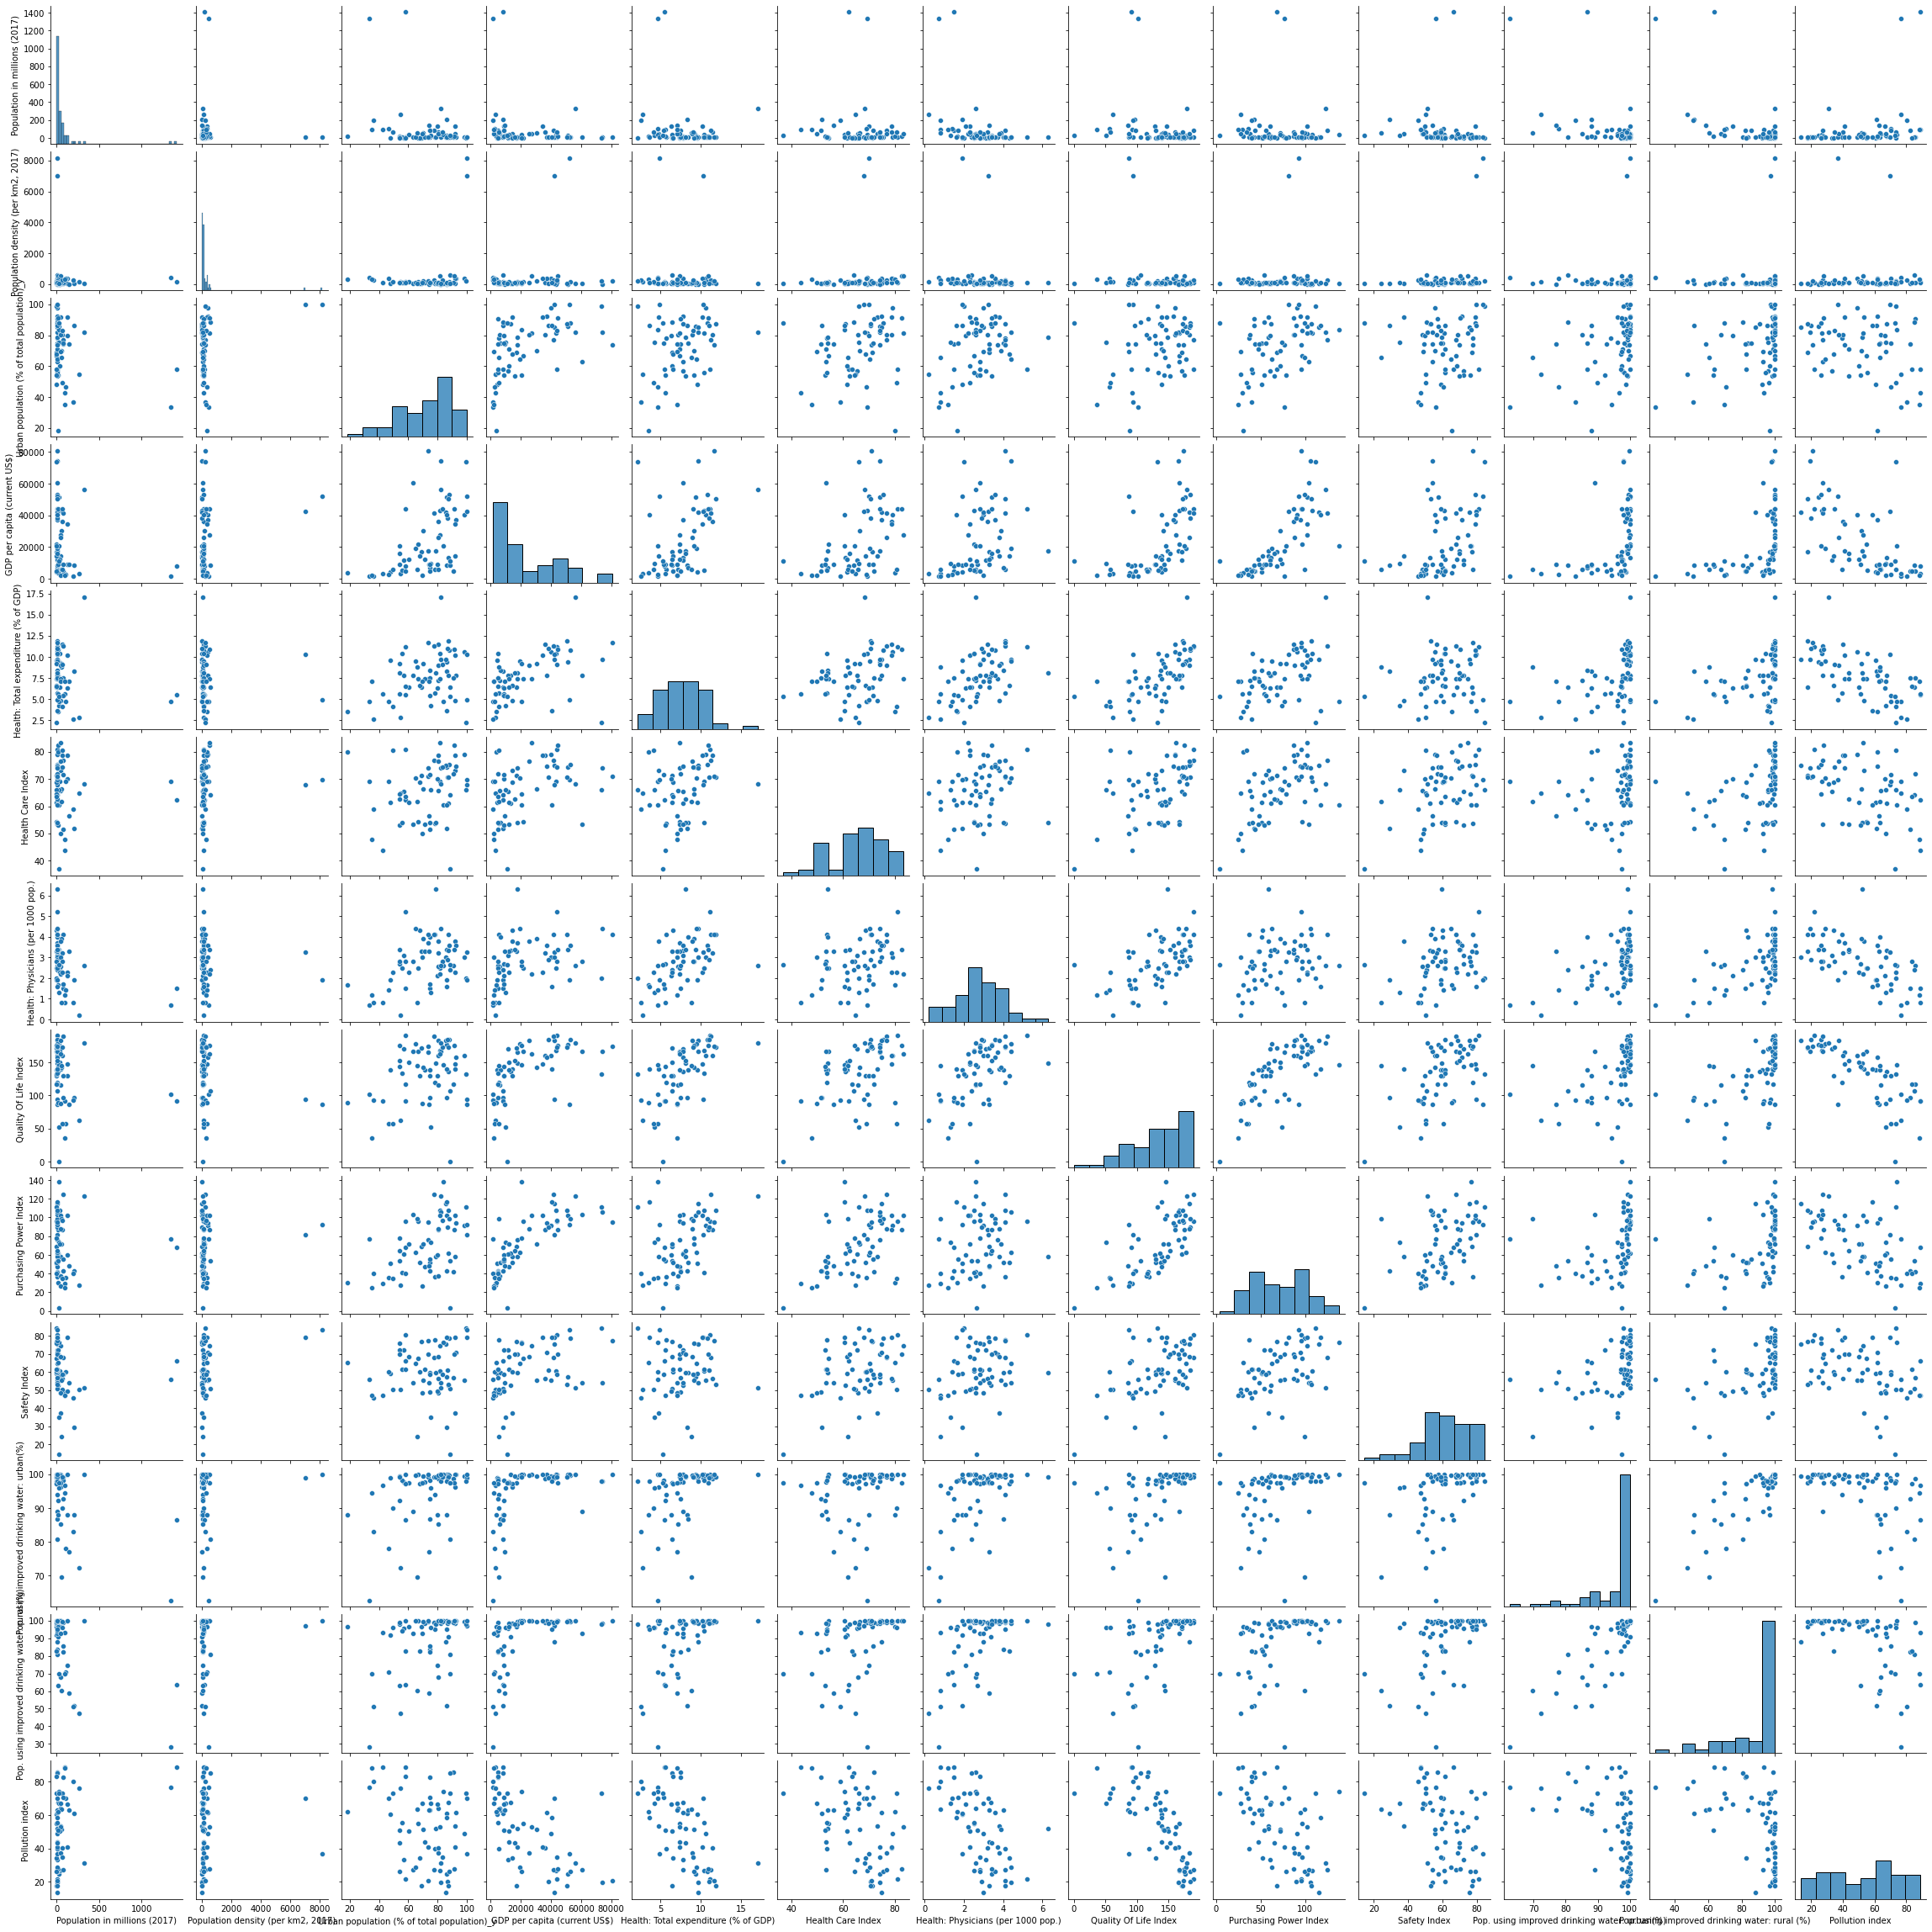

In [49]:
sns.pairplot(data = predictoras, palette='turbo');